In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# load MATLAB files
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

#### Load MATLAB datafiles

In [2]:
data = loadmat('data/ex3data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
y = data['y']
# Add constant for intercept
X = data['X']

print('X: {} (with intercept)'.format(X.shape))
print('y: {}'.format(y.shape))

X: (5000, 400) (with intercept)
y: (5000, 1)


In [4]:
sample = np.random.choice(X.shape[0], 20)
plt.imshow(X[sample].reshape(-1,20).T)
plt.axis('off');

#### Multiclass Logistic Regression with scikit-learn

In [5]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

clf = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(50,50), random_state=1)
clf.fit(X_train, y_train.ravel())

MLPClassifier(alpha=0.1, hidden_layer_sizes=(50, 50), random_state=1,
              solver='lbfgs')

In [6]:
prediction_all = clf.predict(X_test)
print('Training set accuracy: {} %'.format(np.mean(prediction_all == y_test.ravel())*100))

Training set accuracy: 94.0 %


array([1950, 3210, 2569])

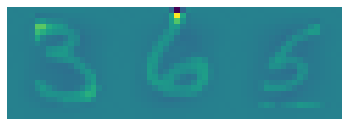

In [43]:
test_index = np.random.choice(X.shape[0],3)
plt.imshow(X[test_index].reshape(-1,20).T)
plt.axis('off');
test_index

In [65]:
prediction = clf.predict(X[test_index[0]].reshape(1,-1))
print(prediction)

[3]


In [66]:
clf.predict_proba(X[test_index[0]].reshape(1,-1))

array([[4.88951142e-06, 3.88336307e-11, 9.99847869e-01, 9.75082545e-16,
        1.43849856e-04, 2.65986203e-15, 1.35271478e-13, 3.34823231e-06,
        4.37061719e-08, 7.65771094e-15]])